In [1]:

# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="ryan_data")
# location = geolocator.geocode("175 5th Avenue NYC")
# print(location.address)

import pandas as pd
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='ryan-data')


cities = {"City": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "Population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "Country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}

df = pd.DataFrame(cities)
df


from geopy.geocoders import Nominatim

out = (
        df.assign(Geocodes= (df['City'] + ", " + df['Country']).apply(geolocator.geocode))
          .assign(Latitude = lambda x: [g.latitude for g in x['Geocodes']],
                  Longitude= lambda x: [g.longitude for g in x['Geocodes']])
          .drop(columns='Geocodes')
      )

out


,City,Population,Country,Latitude,Longitude
0,London,8615246,England,51.507336,-0.127650
1,Berlin,3562166,Germany,52.517037,13.388860
2,Madrid,3165235,Spain,40.416705,-3.703582
3,Rome,2874038,Italy,41.893320,12.482932
4,Paris,2273305,France,48.858890,2.320041
5,Vienna,1805681,Austria,48.208354,16.372504
6,Bucharest,1803425,Romania,44.436141,26.102720
7,Hamburg,1760433,Germany,53.550341,10.000654
8,Budapest,1754000,Hungary,47.481390,19.146094
9,Warsaw,1740119,Poland,52.231958,21.006725


In [25]:

import pandas as pd
import folium
from folium.plugins import FastMarkerCluster


folium_map = folium.Map(location=[48, 2.25],
                        zoom_start=6)

# These two lines should create FastMarkerClusters
FastMarkerCluster(data=list(zip(out['Latitude'].values, out['Longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)

for index, row in out.iterrows():
    # generate the popup message that is shown on click.
    folium.CircleMarker(location=[row["Latitude"],
                                  row["Longitude"]],
                        radius=row['Population']/100000,
                        color="#007849",
                        fill=False).add_to(folium_map)

folium_map


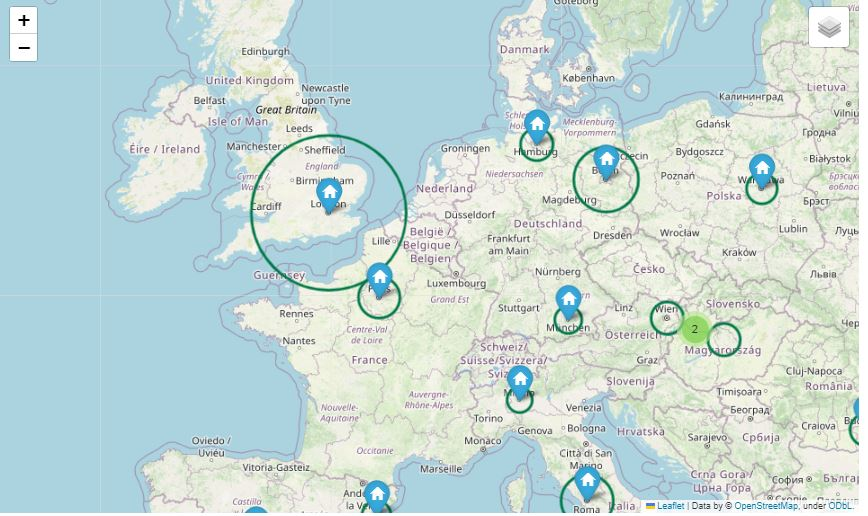

In [27]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryans\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\Longitude & Latitude - Plot Circles By Size Of Population\\"
Image(filename = PATH + "map.JPG")
